# Import Packages

In [1]:
import os
import sys
import os.path as path
import numpy as np
import pandas as pd
import csv
import pickle
import json
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from datetime import date, datetime, timedelta, time
from timeit import default_timer as timer
import time

In [2]:
from TrainModel_Helper import *

# Simulation Directory

In [3]:
sim_dir = '/p/lustre2/jha3/Wildfire/Wildfire_LDRD_SI'

# `json` Input Files

In [4]:
json_extract_base = os.path.join(sim_dir, 'InputJson/Extract/json_extract_data')
json_prep_base = os.path.join(sim_dir, 'InputJson/Prep/json_prep_data_label')
json_train_base = os.path.join(sim_dir, 'InputJson/Train/json_train_model')

# Collect Metrics of Desired Trained Models

### Regression

In [5]:
#json_extract_counts = range(15, 23)
json_extract_counts = list(range(39, 54)) + [55, 56] + list(range(59, 68))
json_prep_counts = [5]
json_train_counts = [3]#[3, 5, 1, 2]
FM_label_type = "Regression"

In [6]:
len(json_extract_counts)

26

In [7]:
trained_models_metrics, data_defn = create_trained_models_metrics (\
                                      json_prep_base, json_prep_counts, \
                                      json_train_base, json_train_counts, \
                                      json_extract_base, json_extract_counts)

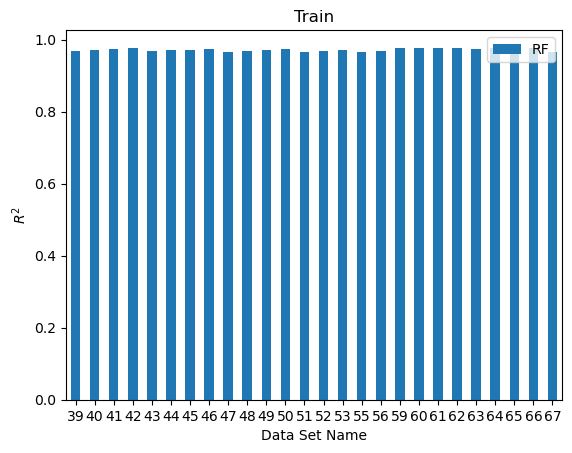

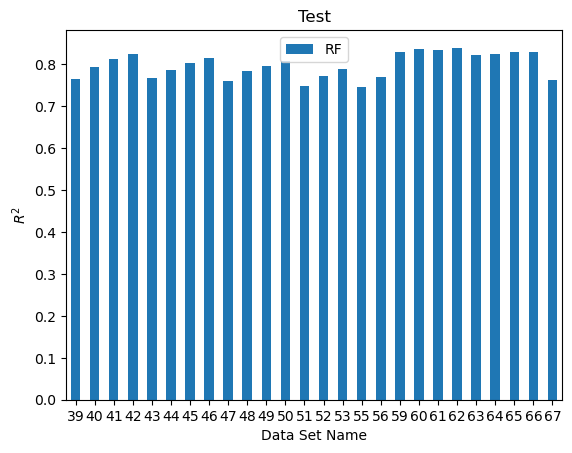

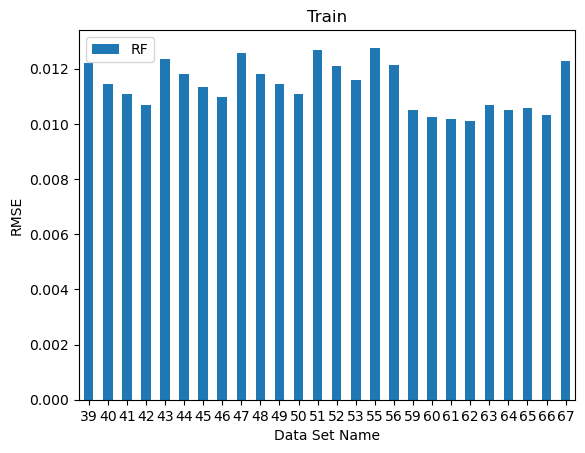

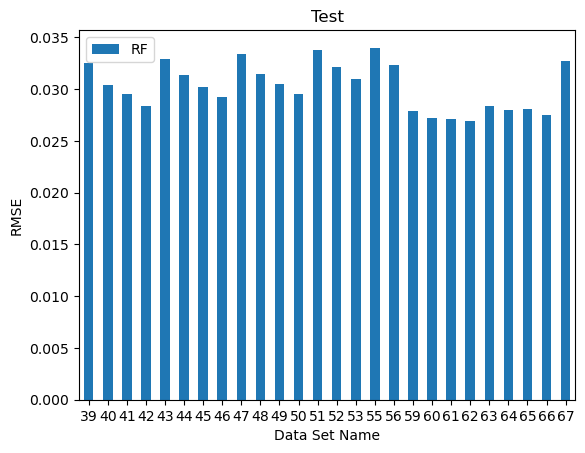

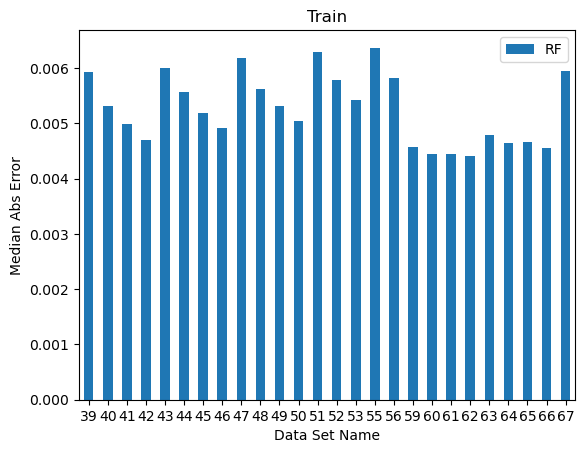

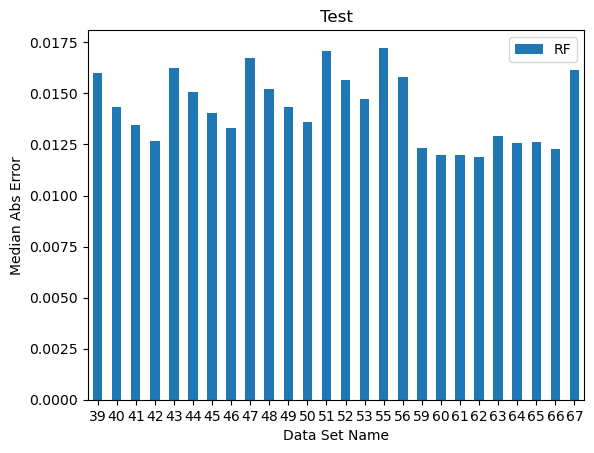

In [8]:
df_train_combined = pd.DataFrame()
df_test_combined = pd.DataFrame()
for metric_name in ['r2_score', 'rmse', 'medae']:
    df_train, df_test = plot_trained_models_metrics (FM_label_type, json_extract_counts, \
                                                     trained_models_metrics, metric_name)
    for col in df_train.columns:
        df_train = df_train.rename(columns = {col: col + '-' + metric_name})
        df_train_combined = pd.concat([df_train_combined, df_train], axis=1)  
        
        df_test = df_test.rename(columns = {col: col + '-' + metric_name})
        df_test_combined = pd.concat([df_test_combined, df_test], axis=1) 

In [9]:
data_defn

,temporal_data [%],spatial_data [%],max_history [hrs],hist_interval [hrs]
39,1.086396,1.191171,32,4
40,1.086396,2.382342,32,4
41,1.086396,3.573513,32,4
42,1.086396,4.764684,32,4
43,1.629593,1.191171,32,4
44,1.629593,2.382342,32,4
45,1.629593,3.573513,32,4
46,1.629593,4.764684,32,4
47,2.172791,1.191171,32,4
48,2.172791,2.382342,32,4


In [10]:
#df_train_combined

In [11]:
df_test_combined

,RF-r2_score,RF-rmse,RF-medae
39,0.766400,0.032490,0.016018
40,0.794778,0.030447,0.014343
41,0.812224,0.029508,0.013471
42,0.825950,0.028380,0.012680
43,0.767360,0.032925,0.016249
44,0.786949,0.031380,0.015056
45,0.802733,0.030202,0.014052
46,0.814963,0.029239,0.013287
47,0.760298,0.033427,0.016740
48,0.784607,0.031449,0.015197


### Binary

In [12]:
'''
json_extract_counts = range(15, 23)
json_prep_counts = [2]
json_train_counts = [1, 3, 2]#[3, 5, 1, 2]
FM_label_type = "Binary"
'''

'\njson_extract_counts = range(15, 23)\njson_prep_counts = [2]\njson_train_counts = [1, 3, 2]#[3, 5, 1, 2]\nFM_label_type = "Binary"\n'

In [13]:
'''
trained_models_metrics, data_defn = create_trained_models_metrics (\
                                  json_prep_base, json_prep_counts, \
                                  json_train_base, json_train_counts, \
                                  json_extract_base, json_extract_counts)

df_train, df_test = plot_trained_models_metrics (FM_label_type, json_extract_counts, \
                                              trained_models_metrics)
                                              '''   

'\ntrained_models_metrics, data_defn = create_trained_models_metrics (                                  json_prep_base, json_prep_counts,                                   json_train_base, json_train_counts,                                   json_extract_base, json_extract_counts)\n\ndf_train, df_test = plot_trained_models_metrics (FM_label_type, json_extract_counts,                                               trained_models_metrics)\n                                              '

In [14]:
#data_defn

In [15]:
#df_train

In [16]:
#df_test

## Effect of Max History

### Regression

In [17]:
json_extract_counts = [42, 59, 60, 61, 62] + [46, 63, 64, 65, 66]
json_prep_counts = [5]
json_train_counts = [3]
FM_label_type = "Regression"

In [18]:
trained_models_metrics, data_defn = create_trained_models_metrics (\
                                      json_prep_base, json_prep_counts, \
                                      json_train_base, json_train_counts, \
                                      json_extract_base, json_extract_counts)

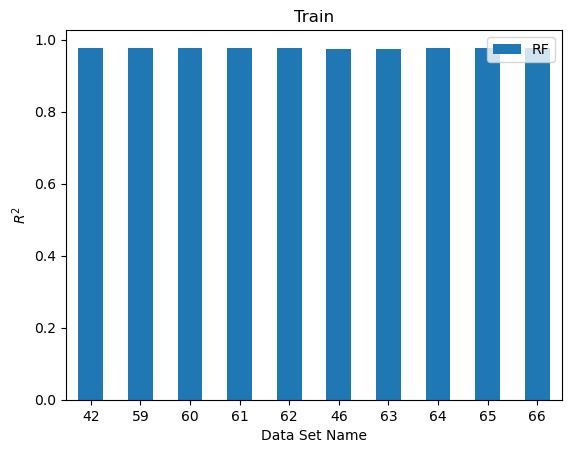

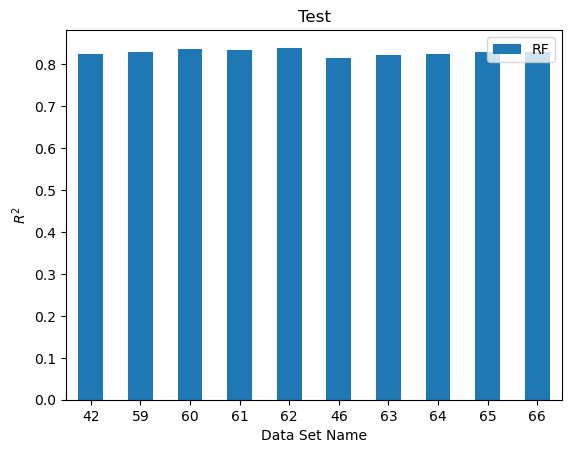

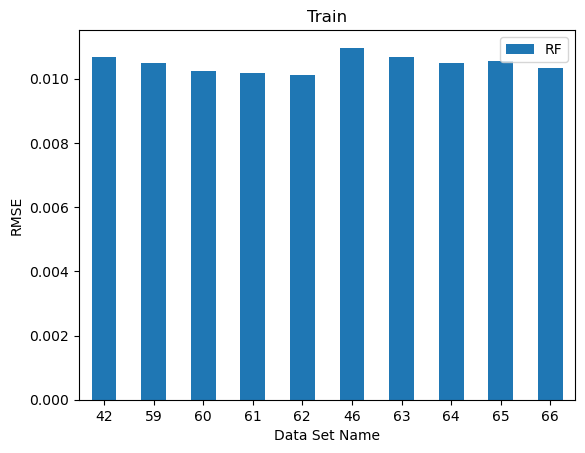

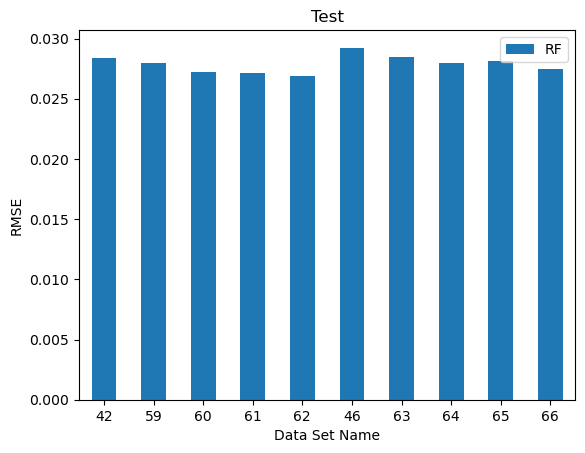

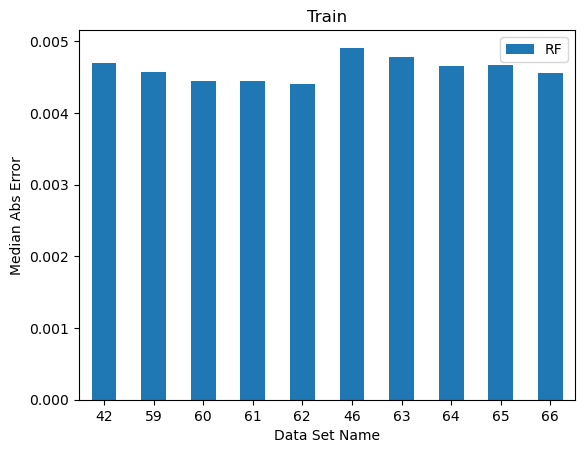

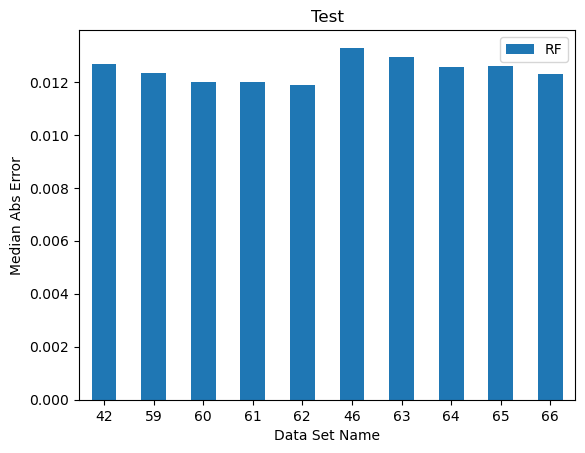

In [19]:
df_train_combined = pd.DataFrame()
df_test_combined = pd.DataFrame()
for metric_name in ['r2_score', 'rmse', 'medae']:
    df_train, df_test = plot_trained_models_metrics (FM_label_type, json_extract_counts, \
                                                     trained_models_metrics, metric_name)
    for col in df_train.columns:
        df_train = df_train.rename(columns = {col: col + '-' + metric_name})
        df_train_combined = pd.concat([df_train_combined, df_train], axis=1)  
        
        df_test = df_test.rename(columns = {col: col + '-' + metric_name})
        df_test_combined = pd.concat([df_test_combined, df_test], axis=1)

In [20]:
data_defn

,temporal_data [%],spatial_data [%],max_history [hrs],hist_interval [hrs]
42,1.086396,4.764684,32,4
59,1.086396,4.764684,36,4
60,1.086396,4.764684,40,4
61,1.086396,4.764684,44,4
62,1.086396,4.764684,48,4
46,1.629593,4.764684,32,4
63,1.629593,4.764684,36,4
64,1.629593,4.764684,40,4
65,1.629593,4.764684,44,4
66,1.629593,4.764684,48,4


In [21]:
df_test_combined

,RF-r2_score,RF-rmse,RF-medae
42,0.825950,0.028380,0.012680
59,0.830304,0.027943,0.012339
60,0.837383,0.027222,0.012000
61,0.834859,0.027103,0.011979
62,0.839888,0.026897,0.011874
46,0.814963,0.029239,0.013287
63,0.822559,0.028429,0.012921
64,0.824071,0.027977,0.012567
65,0.828564,0.028100,0.012603
66,0.830713,0.027490,0.012296


## Effect of History Interval

### Regression

In [22]:
'''
json_extract_counts = [34, 38]
json_prep_counts = [1]
json_train_counts = [1, 3, 4, 5]
FM_label_type = "Regression"
'''

'\njson_extract_counts = [34, 38]\njson_prep_counts = [1]\njson_train_counts = [1, 3, 4, 5]\nFM_label_type = "Regression"\n'

In [23]:
'''
trained_models_metrics, data_defn = create_trained_models_metrics (\
                                      json_prep_base, json_prep_counts, \
                                      json_train_base, json_train_counts, \
                                      json_extract_base, json_extract_counts)

df_train, df_test = plot_trained_models_metrics (FM_label_type, json_extract_counts, \
                                                 trained_models_metrics)
'''

'\ntrained_models_metrics, data_defn = create_trained_models_metrics (                                      json_prep_base, json_prep_counts,                                       json_train_base, json_train_counts,                                       json_extract_base, json_extract_counts)\n\ndf_train, df_test = plot_trained_models_metrics (FM_label_type, json_extract_counts,                                                  trained_models_metrics)\n'

In [24]:
#data_defn

In [25]:
#df_train

In [26]:
#df_test

## Effect of Temporal Data Size

### Regression

In [27]:
json_extract_counts = [41, 45, 49, 53] + [42, 46, 50]
json_prep_counts = [5]
json_train_counts = [3]
FM_label_type = "Regression"

In [28]:
trained_models_metrics, data_defn = create_trained_models_metrics (\
                                      json_prep_base, json_prep_counts, \
                                      json_train_base, json_train_counts, \
                                      json_extract_base, json_extract_counts)

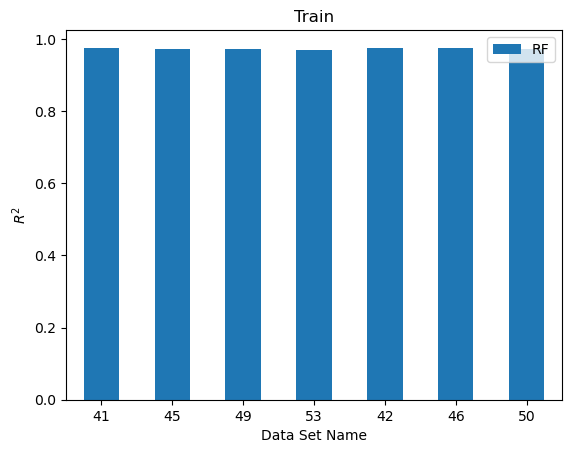

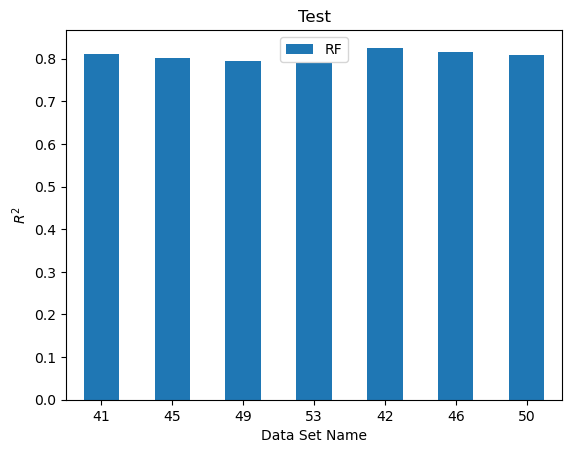

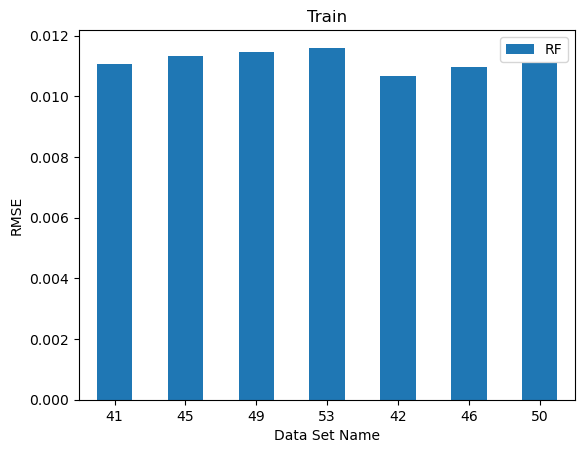

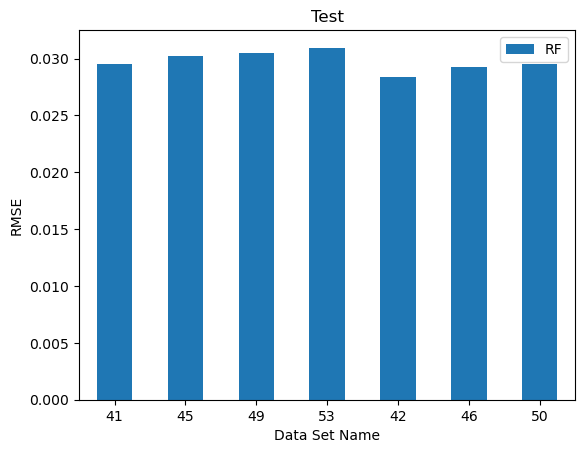

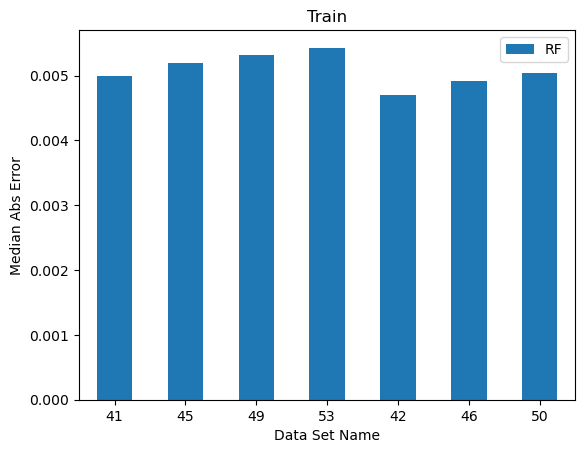

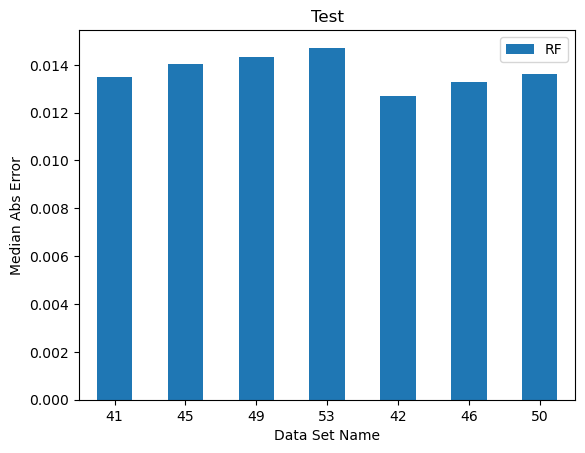

In [29]:
df_train_combined = pd.DataFrame()
df_test_combined = pd.DataFrame()
for metric_name in ['r2_score', 'rmse', 'medae']:
    df_train, df_test = plot_trained_models_metrics (FM_label_type, json_extract_counts, \
                                                     trained_models_metrics, metric_name)
    for col in df_train.columns:
        df_train = df_train.rename(columns = {col: col + '-' + metric_name})
        df_train_combined = pd.concat([df_train_combined, df_train], axis=1)  
        
        df_test = df_test.rename(columns = {col: col + '-' + metric_name})
        df_test_combined = pd.concat([df_test_combined, df_test], axis=1)

In [30]:
data_defn

,temporal_data [%],spatial_data [%],max_history [hrs],hist_interval [hrs]
41,1.086396,3.573513,32,4
45,1.629593,3.573513,32,4
49,2.172791,3.573513,32,4
53,2.715989,3.573513,32,4
42,1.086396,4.764684,32,4
46,1.629593,4.764684,32,4
50,2.172791,4.764684,32,4


In [31]:
df_test_combined

,RF-r2_score,RF-rmse,RF-medae
41,0.812224,0.029508,0.013471
45,0.802733,0.030202,0.014052
49,0.795632,0.030475,0.014341
53,0.789207,0.030961,0.014714
42,0.825950,0.028380,0.012680
46,0.814963,0.029239,0.013287
50,0.807815,0.029567,0.013619


## Effect of Spatial Data Size

### Regression

In [41]:
json_extract_counts = [47, 48, 49, 50] + [51, 52, 53] + [55, 56]
json_prep_counts = [5]
json_train_counts = [3]
FM_label_type = "Regression"

In [42]:
trained_models_metrics, data_defn = create_trained_models_metrics (\
                                      json_prep_base, json_prep_counts, \
                                      json_train_base, json_train_counts, \
                                      json_extract_base, json_extract_counts)

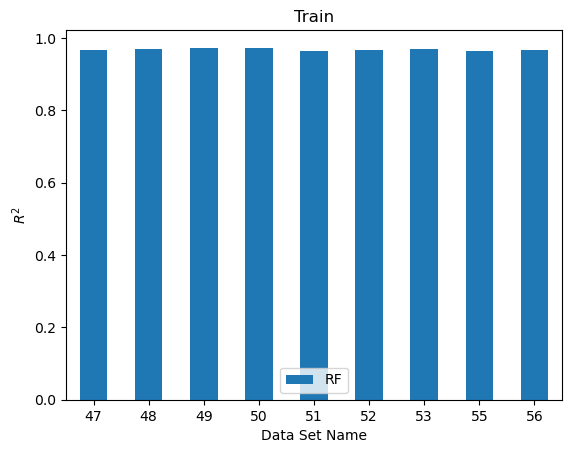

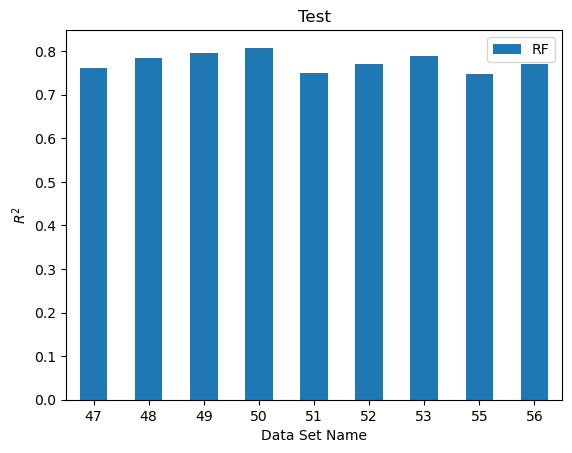

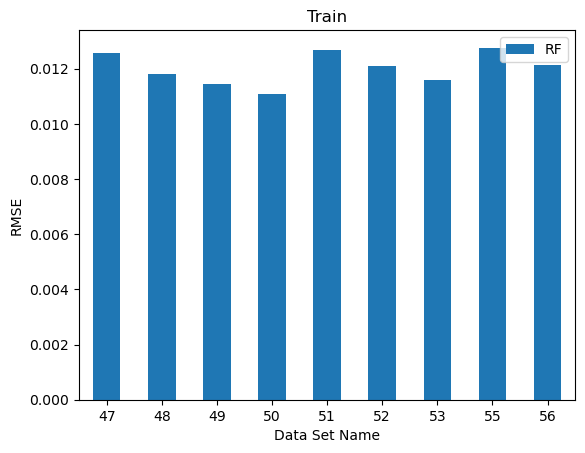

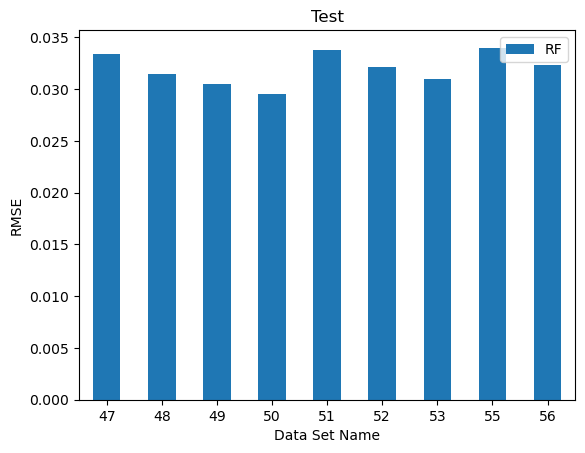

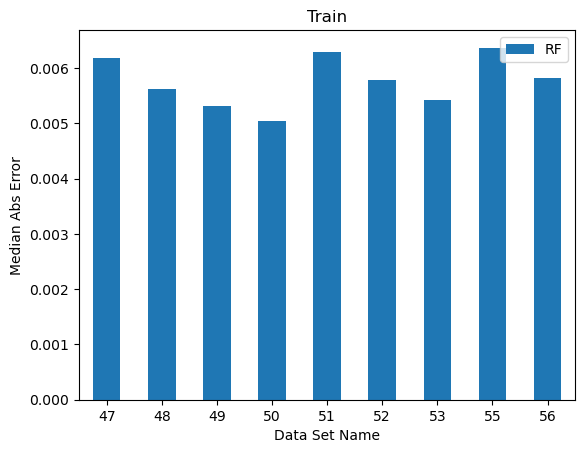

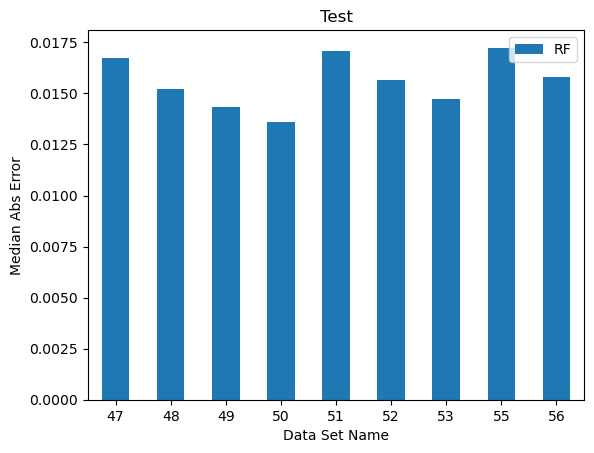

In [43]:
df_train_combined = pd.DataFrame()
df_test_combined = pd.DataFrame()
for metric_name in ['r2_score', 'rmse', 'medae']:
    df_train, df_test = plot_trained_models_metrics (FM_label_type, json_extract_counts, \
                                                     trained_models_metrics, metric_name)
    for col in df_train.columns:
        df_train = df_train.rename(columns = {col: col + '-' + metric_name})
        df_train_combined = pd.concat([df_train_combined, df_train], axis=1)  
        
        df_test = df_test.rename(columns = {col: col + '-' + metric_name})
        df_test_combined = pd.concat([df_test_combined, df_test], axis=1)

In [44]:
data_defn

,temporal_data [%],spatial_data [%],max_history [hrs],hist_interval [hrs]
47,2.172791,1.191171,32,4
48,2.172791,2.382342,32,4
49,2.172791,3.573513,32,4
50,2.172791,4.764684,32,4
51,2.715989,1.191171,32,4
52,2.715989,2.382342,32,4
53,2.715989,3.573513,32,4
55,3.259187,1.191171,32,4
56,3.259187,2.382342,32,4


In [45]:
df_test_combined

,RF-r2_score,RF-rmse,RF-medae
47,0.760298,0.033427,0.016740
48,0.784607,0.031449,0.015197
49,0.795632,0.030475,0.014341
50,0.807815,0.029567,0.013619
51,0.748947,0.033810,0.017100
52,0.771440,0.032168,0.015640
53,0.789207,0.030961,0.014714
55,0.746510,0.034012,0.017237
56,0.771135,0.032322,0.015792


## Scatter Plots

In [37]:
'''
json_extract_counts = [15, 16, 17] #[2, 3, 4, 5, 6, 7, 8]
json_prep_counts = [1]
json_train_counts = [1, 3]
'''

'\njson_extract_counts = [15, 16, 17] #[2, 3, 4, 5, 6, 7, 8]\njson_prep_counts = [1]\njson_train_counts = [1, 3]\n'

In [38]:
'''
max_data_size_scatter = 800
fig_size_x = 8
fig_size_y = 8
font_size  = 10
x_lim      = [0, 0.7]
'''

'\nmax_data_size_scatter = 800\nfig_size_x = 8\nfig_size_y = 8\nfont_size  = 10\nx_lim      = [0, 0.7]\n'

In [39]:
#data_identifier = "Train"

In [40]:
'''
label_count = 1 # Regression
json_prep    = '%s_%03d.json'%(json_prep_base, label_count)
#print(json_prep)
with open(json_prep) as json_file_handle:
    json_content_prep_data = json.load(json_file_handle)
label_count = json_content_prep_data['label_defn']['label_count']
FM_label_type = json_content_prep_data['FM_labels']['label_type']
#print('label_count: {}, FM_label_type: {}\n'.format(label_count, FM_label_type))


fig, ax = plt.subplots(len(json_extract_counts), len(json_train_counts), figsize=(12, 8))

for train_count_ind, train_count in enumerate(json_train_counts):
    json_train   = '%s_%03d.json'%(json_train_base, train_count)
    #print(json_train)
    with open(json_train) as json_file_handle:
        json_content_train_model = json.load(json_file_handle)
    model_count = json_content_train_model['models']['model_count']
    model_name = json_content_train_model['models']['model_name'] # ['RF', SVM', 'MLP']
    #print('Model Count: {}, Model Name: {}\n'.format(model_count, model_name))

    for data_count_ind, data_count in enumerate(json_extract_counts):
        json_extract = '%s_%03d.json'%(json_extract_base, data_count)
        #print(json_extract)
        with open(json_extract) as json_file_handle:
            json_content_extract_data = json.load(json_file_handle)
        data_set_count = json_content_extract_data['data_set_defn']['data_set_count']
        #print('Data Set Count: {}'.format(data_set_count))

        # Names of trained model and related files
        trained_model_base_loc = json_content_train_model['paths']['trained_model_base_loc']
        trained_model_name = 'dataset_%03d_label_%03d_%s_model_%03d_%s'%(data_set_count, \
                                                    label_count, FM_label_type, \
                                                    model_count, model_name)

        trained_model_loc = os.path.join(trained_model_base_loc, trained_model_name)
        trained_model_file_name = '{}_model.pkl'.format(trained_model_name)
        
        train_data_features_file_name  = '{}_features_train.pkl'.format(trained_model_name)
        train_data_labels_file_name    = '{}_labels_train.pkl'.format(trained_model_name)

        test_data_features_file_name   = '{}_features_test.pkl'.format(trained_model_name)
        test_data_labels_file_name     = '{}_labels_test.pkl'.format(trained_model_name)
        
        print('trained_model_file_name: {}'.format(trained_model_file_name))
        #print('train_data_features_file_name: {}'.format(train_data_features_file_name))
        #print('train_data_labels_file_name: {}'.format(train_data_labels_file_name))
        #print('test_data_features_file_name: {}'.format(test_data_features_file_name))
        #print('test_data_labels_file_name: {}'.format(test_data_labels_file_name))
        
        trained_model_file = os.path.join(trained_model_loc, trained_model_file_name)
        model = pickle.load(open(trained_model_file, 'rb'))
        #print ('\nLoaded the ML model file at: {}\n'.format(trained_model_file))
        #print ('The model loaded is: {} \n'.format(model))
        
        if (data_identifier == "Train"):
            #print('Loading the saved features and labels used in training')
            features_train = pickle.load(open(os.path.join(\
                                    trained_model_loc, train_data_features_file_name), 'rb'))
            labels_train   =  pickle.load(open(os.path.join(\
                                    trained_model_loc, train_data_labels_file_name), 'rb'))
            labels_pred_train = predict(model, features_train, "Train Data")
            accuracy_train = get_accuracy_score(model, FM_label_type, \
                                   features_train, labels_train, labels_pred_train,\
                                   "Train Data")
            labels_gt = labels_train
            labels_pred = labels_pred_train
            accuracy = accuracy_train
        else:
            #print('Loading the saved features and labels meant for testing')
            features_test = pickle.load(open(os.path.join(\
                            trained_model_loc, test_data_features_file_name), 'rb'))
            labels_test   =  pickle.load(open(os.path.join(\
                                    trained_model_loc, test_data_labels_file_name), 'rb'))
            labels_pred_test = predict(model, features_test, "Test Data")
            accuracy_test = get_accuracy_score(model, FM_label_type, \
                                   features_test, labels_test, labels_pred_test,\
                                   "Test Data")
            
            labels_gt = labels_test
            labels_pred = labels_pred_test
            accuracy = accuracy_test
        
        labels_gt_range = [labels_gt.min(), labels_gt.max()]
        data_indices = range(len(labels_gt))
        if (max_data_size_scatter < 1):
            data_ind_subset = data_indices
        else:
            data_ind_subset = random.sample(data_indices, k = max_data_size_scatter)
            
        ax[data_count_ind, train_count_ind].scatter(labels_gt[data_ind_subset], labels_pred[data_ind_subset])
        ax[data_count_ind, train_count_ind].plot(labels_gt_range, labels_gt_range, '--r')
        ax[data_count_ind, train_count_ind].set_xlabel('Ground Truth', fontsize = font_size)
        ax[data_count_ind, train_count_ind].set_ylabel('Prediction', fontsize = font_size)
        ax[data_count_ind, train_count_ind].set_title('Model: {}, Accuracy: {:.3f}'.format(model_name, accuracy), fontsize = font_size)
        ax[data_count_ind, train_count_ind].set_xlim(x_lim)
        ax[data_count_ind, train_count_ind].set_ylim(x_lim)
        #ax[data_count_ind, train_count_ind].set_yticks(fontsize = font_size, rotation = 0)
        #ax[data_count_ind, train_count_ind].set_xticks(fontsize = font_size, rotation = 0)
        #print('\n')

#print('\n')      

SyntaxError: incomplete input (1638929025.py, line 1)

In [ ]:
#data_identifier = "Test"

In [ ]:
'''
label_count = 1 # Regression
json_prep    = '%s_%03d.json'%(json_prep_base, label_count)
#print(json_prep)
with open(json_prep) as json_file_handle:
    json_content_prep_data = json.load(json_file_handle)
label_count = json_content_prep_data['label_defn']['label_count']
FM_label_type = json_content_prep_data['FM_labels']['label_type']
#print('label_count: {}, FM_label_type: {}\n'.format(label_count, FM_label_type))


fig, ax = plt.subplots(len(json_extract_counts), len(json_train_counts), figsize=(12, 8))

for train_count_ind, train_count in enumerate(json_train_counts):
    json_train   = '%s_%03d.json'%(json_train_base, train_count)
    #print(json_train)
    with open(json_train) as json_file_handle:
        json_content_train_model = json.load(json_file_handle)
    model_count = json_content_train_model['models']['model_count']
    model_name = json_content_train_model['models']['model_name'] # ['RF', SVM', 'MLP']
    #print('Model Count: {}, Model Name: {}\n'.format(model_count, model_name))

    for data_count_ind, data_count in enumerate(json_extract_counts):
        json_extract = '%s_%03d.json'%(json_extract_base, data_count)
        #print(json_extract)
        with open(json_extract) as json_file_handle:
            json_content_extract_data = json.load(json_file_handle)
        data_set_count = json_content_extract_data['data_set_defn']['data_set_count']
        #print('Data Set Count: {}'.format(data_set_count))

        # Names of trained model and related files
        trained_model_base_loc = json_content_train_model['paths']['trained_model_base_loc']
        trained_model_name = 'dataset_%03d_label_%03d_%s_model_%03d_%s'%(data_set_count, \
                                                    label_count, FM_label_type, \
                                                    model_count, model_name)

        trained_model_loc = os.path.join(trained_model_base_loc, trained_model_name)
        trained_model_file_name = '{}_model.pkl'.format(trained_model_name)
        
        train_data_features_file_name  = '{}_features_train.pkl'.format(trained_model_name)
        train_data_labels_file_name    = '{}_labels_train.pkl'.format(trained_model_name)

        test_data_features_file_name   = '{}_features_test.pkl'.format(trained_model_name)
        test_data_labels_file_name     = '{}_labels_test.pkl'.format(trained_model_name)
        
        #print('trained_model_file_name: {}'.format(trained_model_file_name))
        #print('train_data_features_file_name: {}'.format(train_data_features_file_name))
        #print('train_data_labels_file_name: {}'.format(train_data_labels_file_name))
        #print('test_data_features_file_name: {}'.format(test_data_features_file_name))
        #print('test_data_labels_file_name: {}'.format(test_data_labels_file_name))
        
        trained_model_file = os.path.join(trained_model_loc, trained_model_file_name)
        model = pickle.load(open(trained_model_file, 'rb'))
        #print ('\nLoaded the ML model file at: {}\n'.format(trained_model_file))
        #print ('The model loaded is: {} \n'.format(model))
        
        if (data_identifier == "Train"):
            #print('Loading the saved features and labels used in training')
            features_train = pickle.load(open(os.path.join(\
                                    trained_model_loc, train_data_features_file_name), 'rb'))
            labels_train   =  pickle.load(open(os.path.join(\
                                    trained_model_loc, train_data_labels_file_name), 'rb'))
            labels_pred_train = predict(model, features_train, "Train Data")
            accuracy_train = get_accuracy_score(model, FM_label_type, \
                                   features_train, labels_train, labels_pred_train,\
                                   "Train Data")
            labels_gt = labels_train
            labels_pred = labels_pred_train
            accuracy = accuracy_train
        else:
            #print('Loading the saved features and labels meant for testing')
            features_test = pickle.load(open(os.path.join(\
                            trained_model_loc, test_data_features_file_name), 'rb'))
            labels_test   =  pickle.load(open(os.path.join(\
                                    trained_model_loc, test_data_labels_file_name), 'rb'))
            labels_pred_test = predict(model, features_test, "Test Data")
            accuracy_test = get_accuracy_score(model, FM_label_type, \
                                   features_test, labels_test, labels_pred_test,\
                                   "Test Data")
            
            labels_gt = labels_test
            labels_pred = labels_pred_test
            accuracy = accuracy_test
        
        labels_gt_range = [labels_gt.min(), labels_gt.max()]
        data_indices = range(len(labels_gt))
        if (max_data_size_scatter < 1):
            data_ind_subset = data_indices
        else:
            data_ind_subset = random.sample(data_indices, k = max_data_size_scatter)
            
        ax[data_count_ind, train_count_ind].scatter(labels_gt[data_ind_subset], labels_pred[data_ind_subset])
        ax[data_count_ind, train_count_ind].plot(labels_gt_range, labels_gt_range, '--r')
        ax[data_count_ind, train_count_ind].set_xlabel('Ground Truth', fontsize = font_size)
        ax[data_count_ind, train_count_ind].set_ylabel('Prediction', fontsize = font_size)
        ax[data_count_ind, train_count_ind].set_title('Model: {}, Accuracy: {:.3f}'.format(model_name, accuracy), fontsize = font_size)
        ax[data_count_ind, train_count_ind].set_xlim(x_lim)
        ax[data_count_ind, train_count_ind].set_ylim(x_lim)
        #ax[data_count_ind, train_count_ind].set_yticks(fontsize = font_size, rotation = 0)
        #ax[data_count_ind, train_count_ind].set_xticks(fontsize = font_size, rotation = 0)
        #print('\n')

#print('\n')
'''